In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Junction 2022/dataset/user_consumption.csv", parse_dates=[0], index_col=[0])

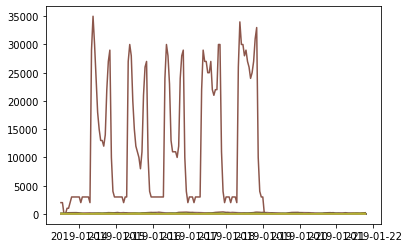

In [ ]:
def replace_outlier(val, mean, std):
    if val > mean + 3*std:
        return mean + 3*std 
    elif val < mean - 3*std:
        return mean - 3*std
    return val

for col in data.columns:
    plt.plot(data[col])
    mean = data[col].mean()
    std_dev = data[col].std(axis=0)
    data[col] = data[col].map(lambda x: replace_outlier(x, mean, std_dev))

In [ ]:
formatted_data = data.values.transpose().reshape(data.shape[0], data.shape[1], 1)

In [ ]:
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN
cluster_count = math.ceil(math.sqrt(len(formatted_data))) 
print(cluster_count)
 

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw", random_state=42)

labels = km.fit_predict(formatted_data)

15


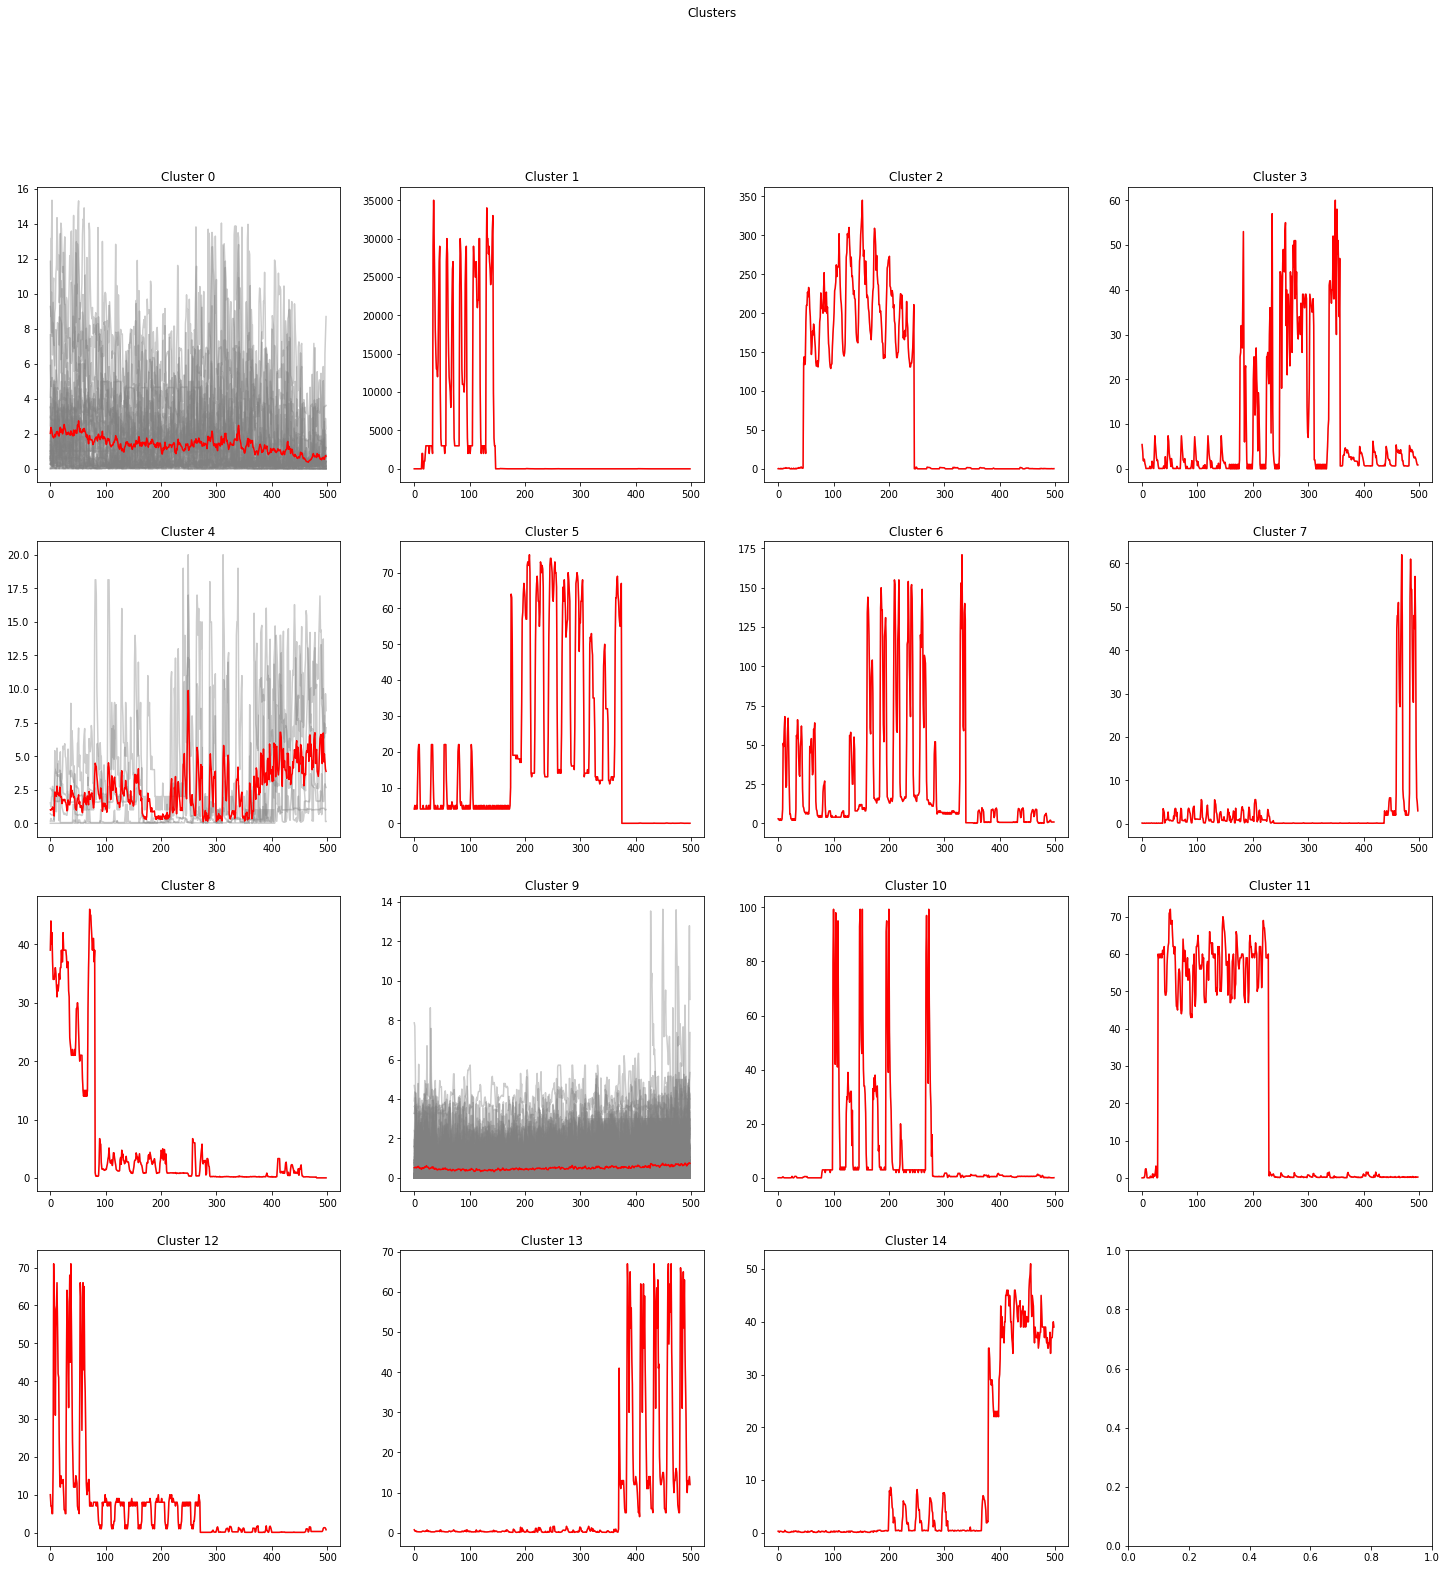

In [ ]:
plot_count = math.ceil(math.sqrt(cluster_count))
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(formatted_data))))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(formatted_data[i],c="gray",alpha=0.4)
                cluster.append(formatted_data[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.hstack(cluster), axis=1), c="red")

    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()